# I am going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.
## The goal of this analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.
John Hogue made the dataset available, and you can download it from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

In [12]:
import pandas as pd
pd.options.display.max_columns = 999

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns


In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## There is 48284 rows by 9 columns in this dataset
No missing values

column names are in snake_case

date_time is in object type

In [42]:
#convert date_time to date_time column type
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48204 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
 9   time                 48204 non-null  object        
 10  date                 48204 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 4.4+ MB


In [8]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [41]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


## Hourly Interstate 94 Westbound traffic volume

temp-----------------kelvin

rain_1h--------------in mm rain/hour

snow_1h--------------mm snow/hour

clouds_all-----------Percentage cloud cover

weather_main---------description of the current weather

weather_description--Longer textual description of the current weather

date_time------------DateTime Hour of the data collected in CST time

traffic_volume-------Hourly westbound traffic volume

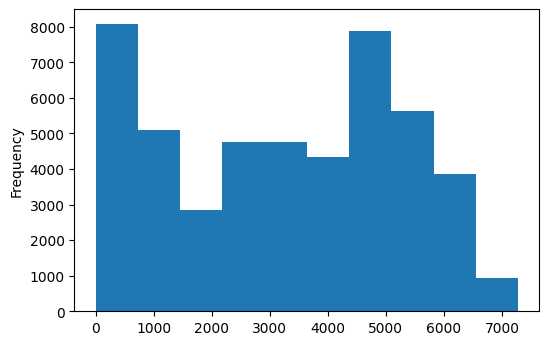

In [13]:
traffic['traffic_volume'].plot.hist()

The distribution is bimodial. i wonder if thats related to the time of the day.

In [35]:
#creat a separate time and date columns
traffic['time'] = traffic['date_time'].dt.time
traffic['date'] = traffic['date_time'].dt.date


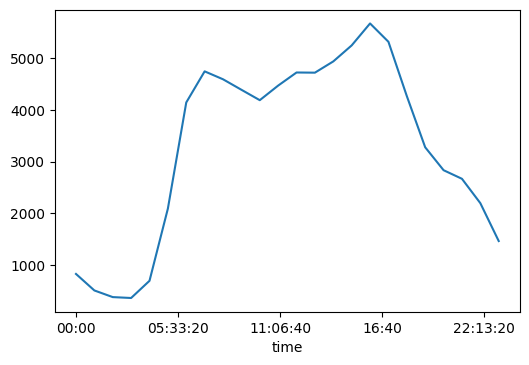

In [33]:
#plot the avg traffic volume by time
traffic.groupby('time').mean()['traffic_volume'].plot.line()

The plot above shows that on average traffic reaches peak around 6:30 and starts to decrease around 16:40. this makes sense as those are the normal working hours o most people.

I want to look at the traffic_volume distribution at night vs during the day to confirm this finding is not driven by some outliers.

In [44]:
#divide data to two section 7 to 17 and the rest.
day_time = traffic[traffic.date_time.dt.hour.between(7,17)]
night_time = traffic[~traffic.date_time.dt.hour.between(7,17)]

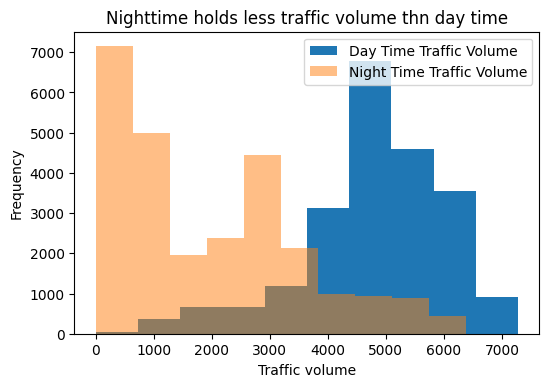

In [50]:
day_time['traffic_volume'].plot.hist(label = 'Day Time Traffic Volume')
night_time['traffic_volume'].plot.hist(alpha=0.5,label = 'Night Time Traffic Volume')
plt.legend()
plt.title('Nighttime holds less traffic volume thn day time')
plt.xlabel('Traffic volume')
plt.show()

The histograms above show that traffic volume distribution in the day time is left skewed and vice versa. confirming that there is generally less traffic at night. DUH!!

However, based on this finding we can disregard the data from night time since it represents low traffic times. and we are trying to find out what factors influences high traffic volume.

Lets look at the distribution of traffic volume per month during the daytime.

In [62]:
# aggregate date by month
months = day_time['date_time'].dt.month.sort_values().unique()
monthly_traffic_volume = {}
for month in months:
    monthly_traffic_volume[month] = day_time[day_time.date_time.dt.month == month]


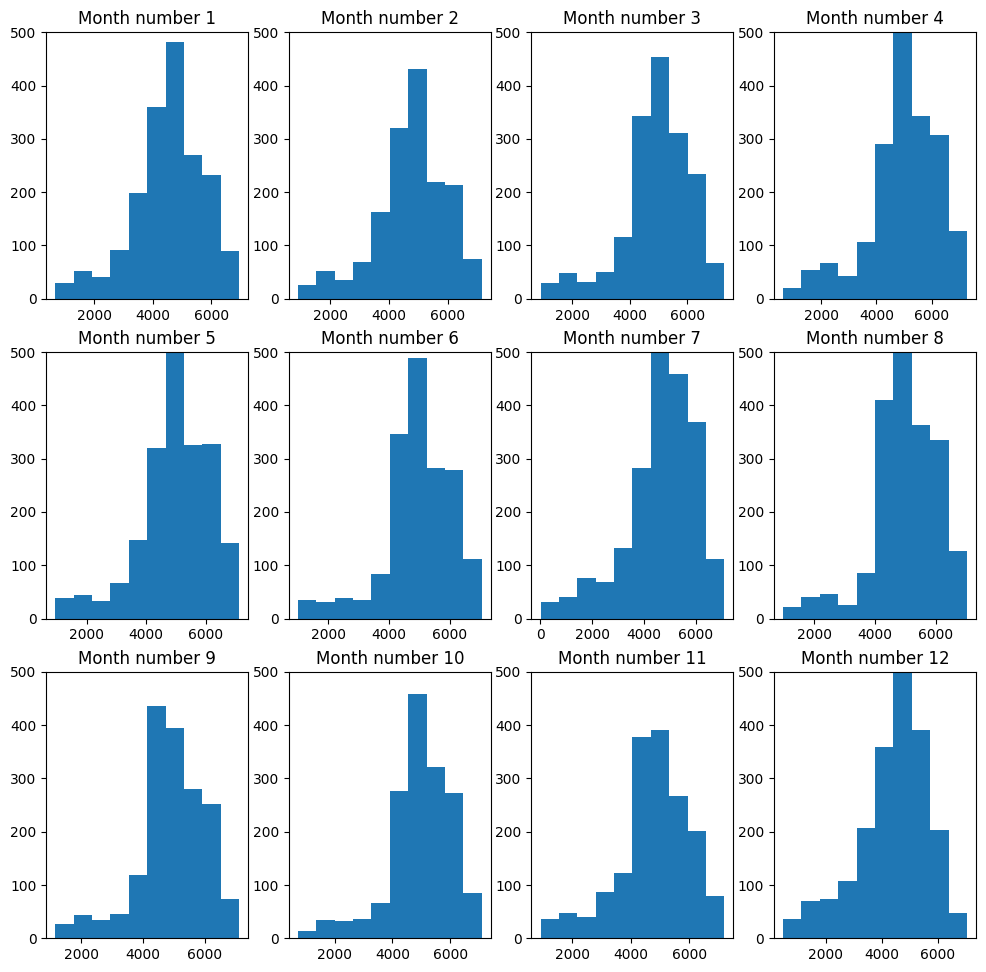

In [77]:
plt.figure(figsize=(12,12))
for i,month in zip(range(1,13), months):
    plt.subplot(3,4,i)
    plt.hist(monthly_traffic_volume[month]['traffic_volume'])
    plt.title(('Month number '+str(month)))
    plt.ylim(0,500)
plt.show()

Qualitativly speaking most month show the same distribution of traffic during the day.

Lets look at weather correlations with traffic_volume

In [80]:
day_time.corr()['traffic_volume'][['temp','rain_1h','snow_1h','clouds_all']]

temp          0.134143
rain_1h       0.003527
snow_1h       0.001089
clouds_all   -0.029090
Name: traffic_volume, dtype: float64

Temp. is the most correlated so lets explore that further.

In [84]:
day_time['temp'].value_counts(bins=10).sort_index()

(-0.311, 31.007]          2
(31.007, 62.014]          0
(62.014, 93.021]          0
(93.021, 124.028]         0
(124.028, 155.035]        0
(155.035, 186.042]        0
(186.042, 217.049]        0
(217.049, 248.056]       45
(248.056, 279.063]     9250
(279.063, 310.07]     12594
Name: temp, dtype: int64

In [85]:
cln_day_time = daytime[day_time['temp'].between(217,311)]

Text(0.5, 1.0, 'Temperature distribution during the day')

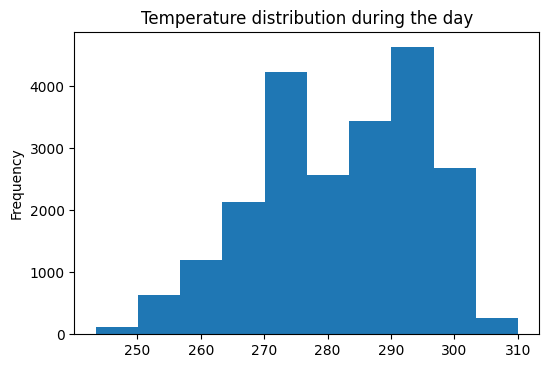

In [92]:
cln_day_time['temp'].plot.hist()
plt.title('Temperature distribution during the day')

Again we see a bimodial distribution. its probably the winter vs summer. we have already looked at the traffic volume distribution per month and most month look the same.

lets look into the relationship between temp and traffic_volume.

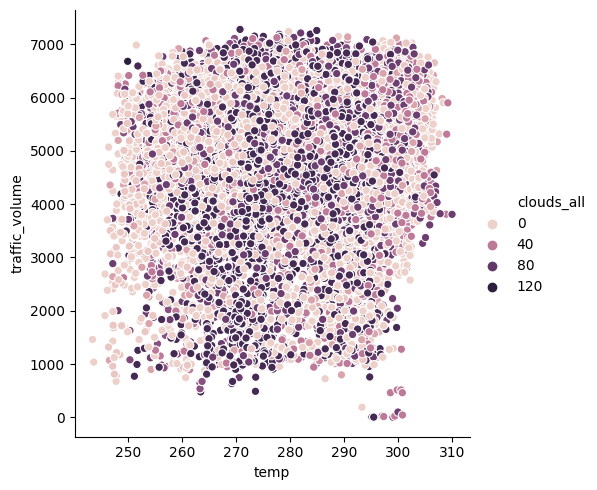

In [91]:
sns.relplot(x='temp', y='traffic_volume',hue='clouds_all', data=cln_day_time)

It doesnt seam that in this particular case Temp. or cloud coverage are indicators of traffic volume.

Lets look at the weather description columns.

In [93]:
day_time['weather_description'].value_counts()

sky is clear                           4478
broken clouds                          2570
mist                                   2445
overcast clouds                        2346
scattered clouds                       1977
light rain                             1544
few clouds                             1036
light snow                              907
haze                                    783
Sky is Clear                            774
moderate rain                           719
light intensity drizzle                 525
fog                                     346
heavy snow                              294
proximity thunderstorm                  267
drizzle                                 254
heavy intensity rain                    197
snow                                    126
proximity shower rain                   100
thunderstorm                             39
thunderstorm with heavy rain             23
heavy intensity drizzle                  23
thunderstorm with light rain    

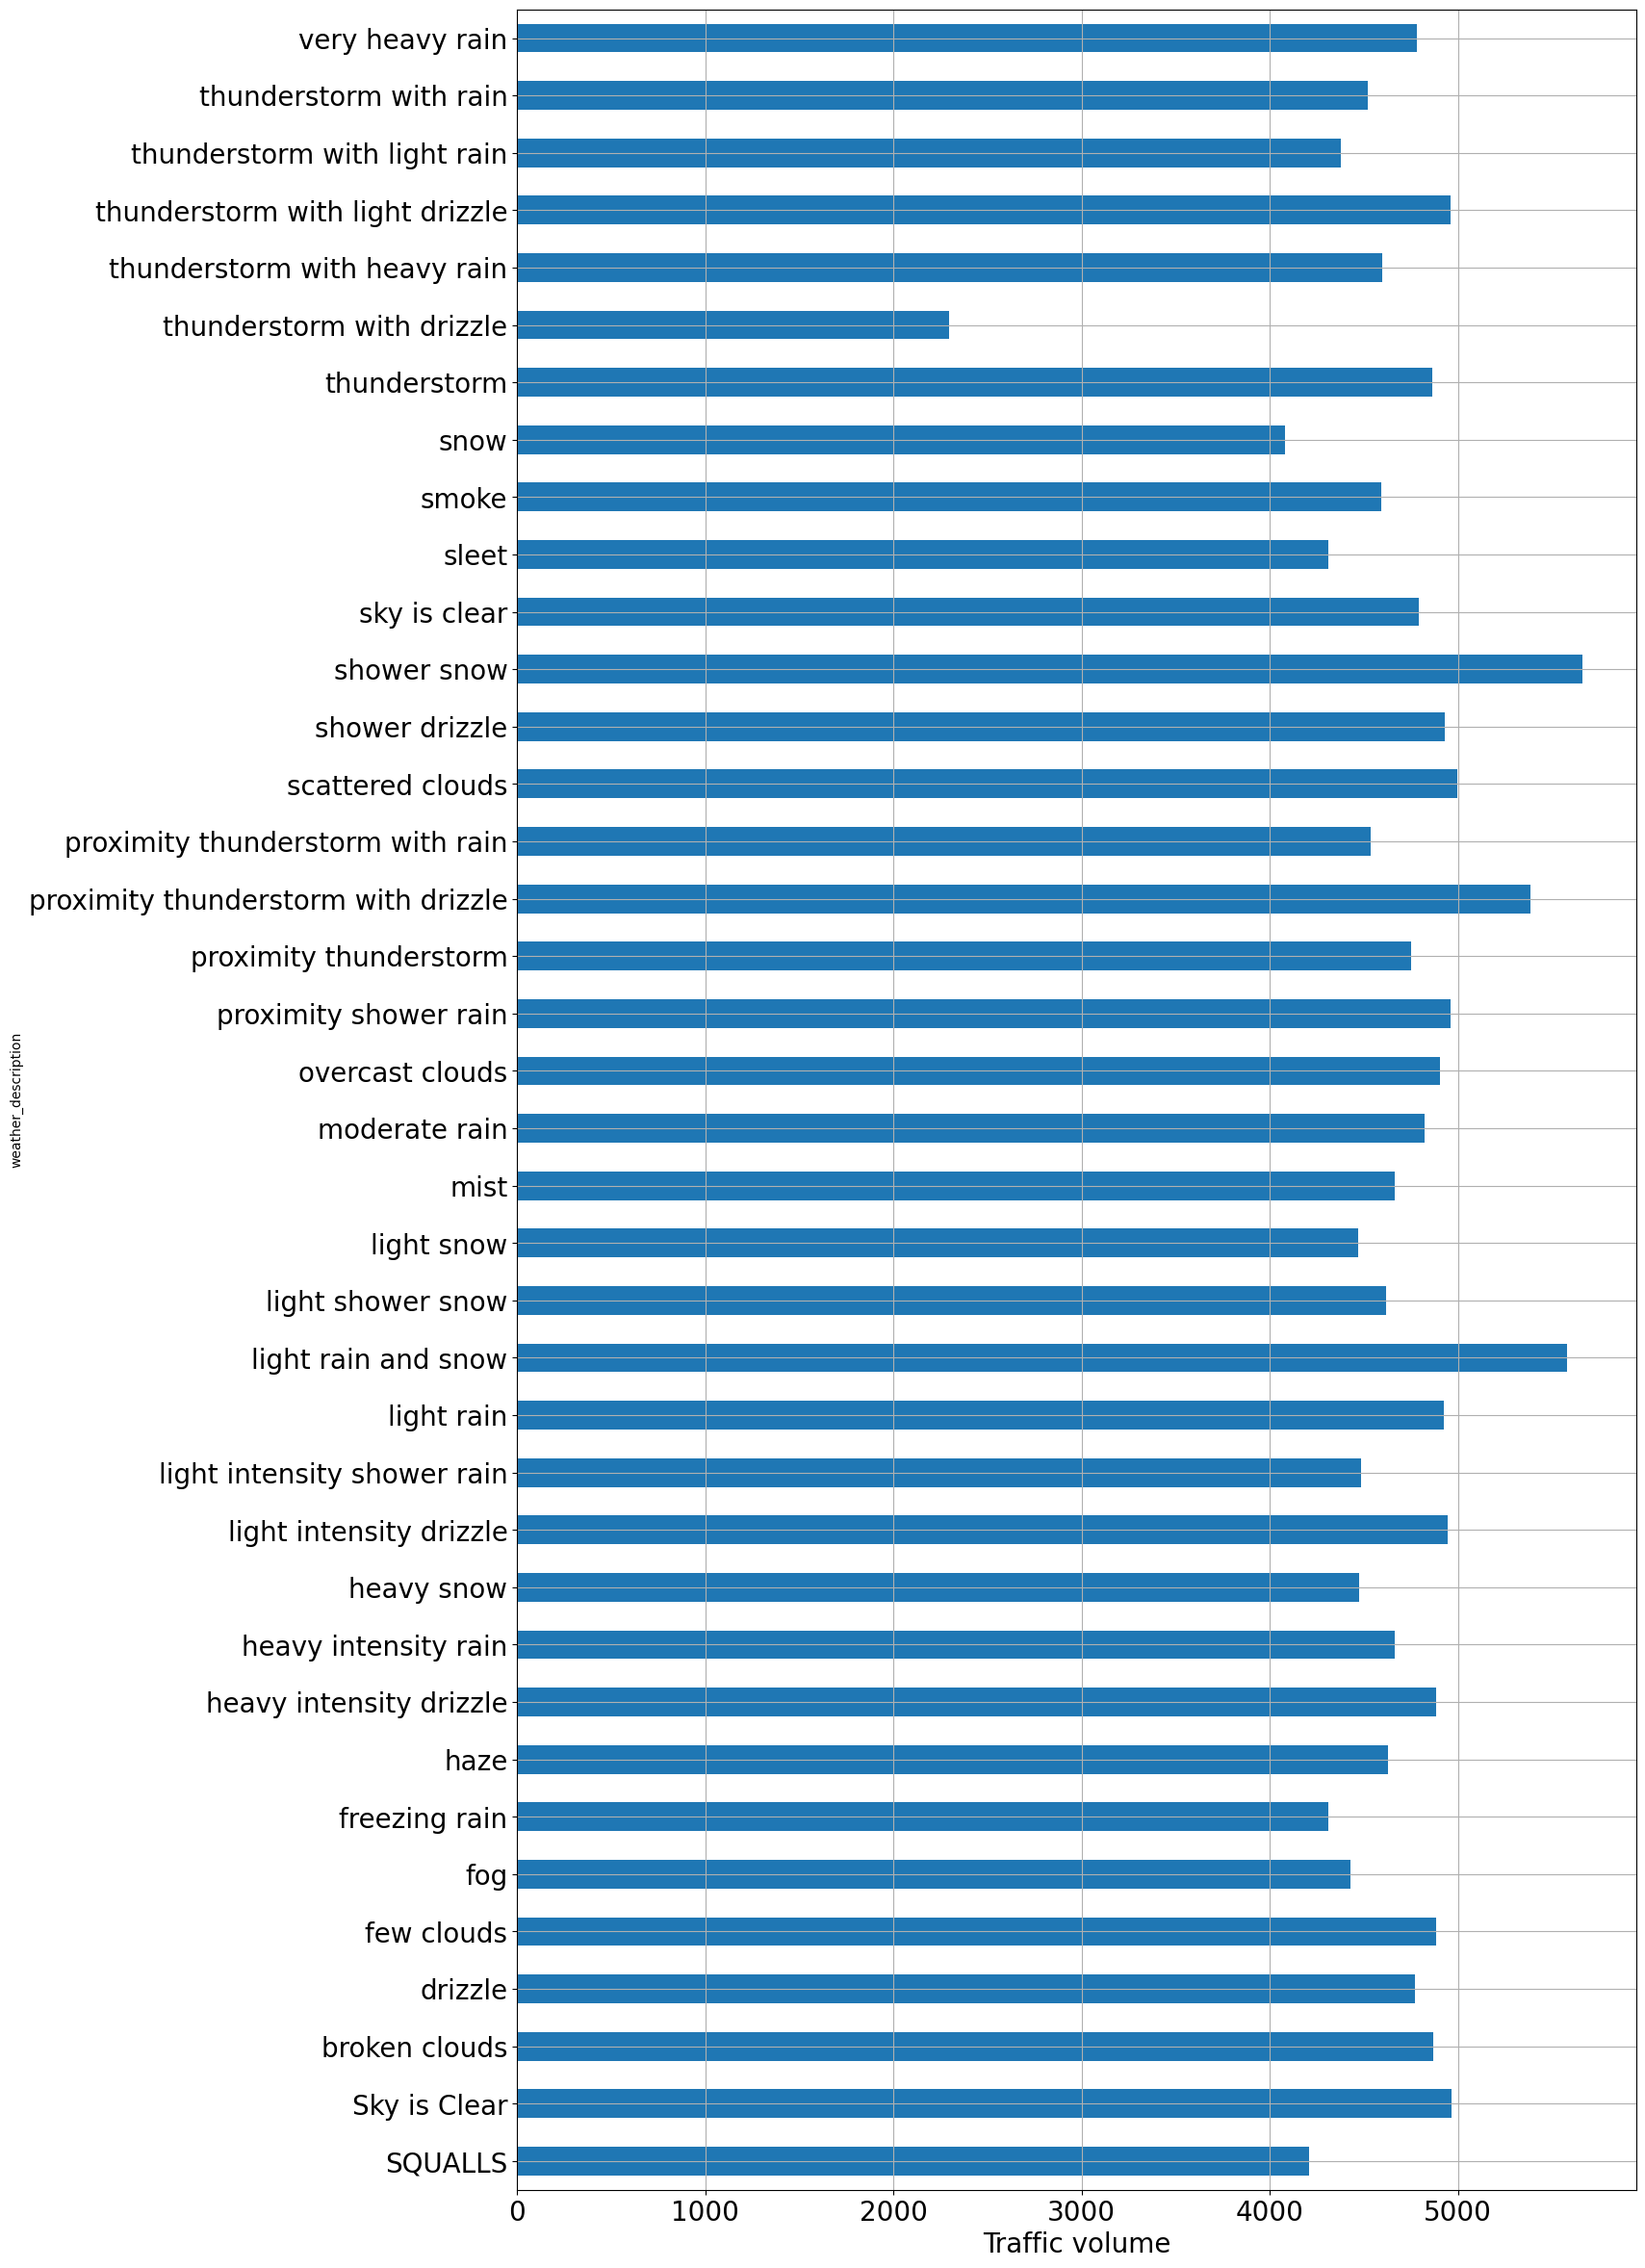

In [109]:
day_time.groupby('weather_description').mean()['traffic_volume'].plot.barh(figsize=(15,30))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Traffic volume', fontsize=20)
plt.grid()

On average there is increased traffic volume on:

light rain and snow

proximity thunderstorm with drizzle

shower snow